<a href="https://colab.research.google.com/github/kushjaggi/Spotify-CaseStudy/blob/main/Case_Study_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study on Spotify Data for a Music Label


<h2>Problem Statement

Your client is a music label company that represents a diverse range of artists. They have provided
us with a comprehensive dataset of popular songs from 2023, containing information such as
track details, release date, streaming metrics, and musical attributes. The company is looking to
make data-informed decisions to optimize the performance of their songs on Spotify and other streaming platforms. They are particularly interested in understanding the factors that contribute to a song's success and how they can improve the visibility and engagement of their artists' music.
Additionally, the client wants to implement machine learning models to predict the success of new song releases. They seek to build models that can forecast the number of streams a song is likely to receive based on various attributes. This predictive capability will aid in strategic decision-making, including song selection for promotion, release timing, and budget allocation for marketing campaigns.

<h2>Primary Objectives

1. Perform extensive exploratory data analysis on the data to gather insights and find answers
to questions including (but not limited to):
o What are the key attributes or characteristics that correlate with higher streaming
numbers?
o Which musical attributes are associated with songs that tend to receive higher
numbers of streams?
o Are there specific genres or artist counts that have shown a strong influence on the
streaming success of songs in 2023?
o Is there a particular time of the year (release month or day) that appears to be more
favorable for launching songs to achieve better streaming results?

2. Build a machine learning model to predict the number of streams a song receives in a year
based on all the key attributes given in the dataset.
3. Considering the insights derived, provide recommendations to the music label company
regarding their marketing strategies for the upcoming fiscal year. Additionally, suggest the
characteristics and attributes that should be emphasized when producing new music to
optimize their performance on music streaming platforms.

<h2> Link to Dataset

https://drive.google.com/drive/folders/1swLUaLZEzze1Ml1UhWeoAjMygnYWhxEN?usp=sharing

<h2>Presentation

Prepare a comprehensive presentation summarizing the outcomes of the exploratory data
analysis, as well as the methodologies employed in developing the regression model for
determining the stream count.

https://docs.google.com/presentation/d/1iwpy5utP25umOYoak__YfZ8y0elAoJEQ/edit?usp=sharing&ouid=107542704272236197802&rtpof=true&sd=true

# **Libraries utilized**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

# **Data Preprocessing**

In [ ]:
# Load your data
df_pre = pd.read_csv('/content/spotify-2023.csv',encoding='latin-1')

<Axes: >

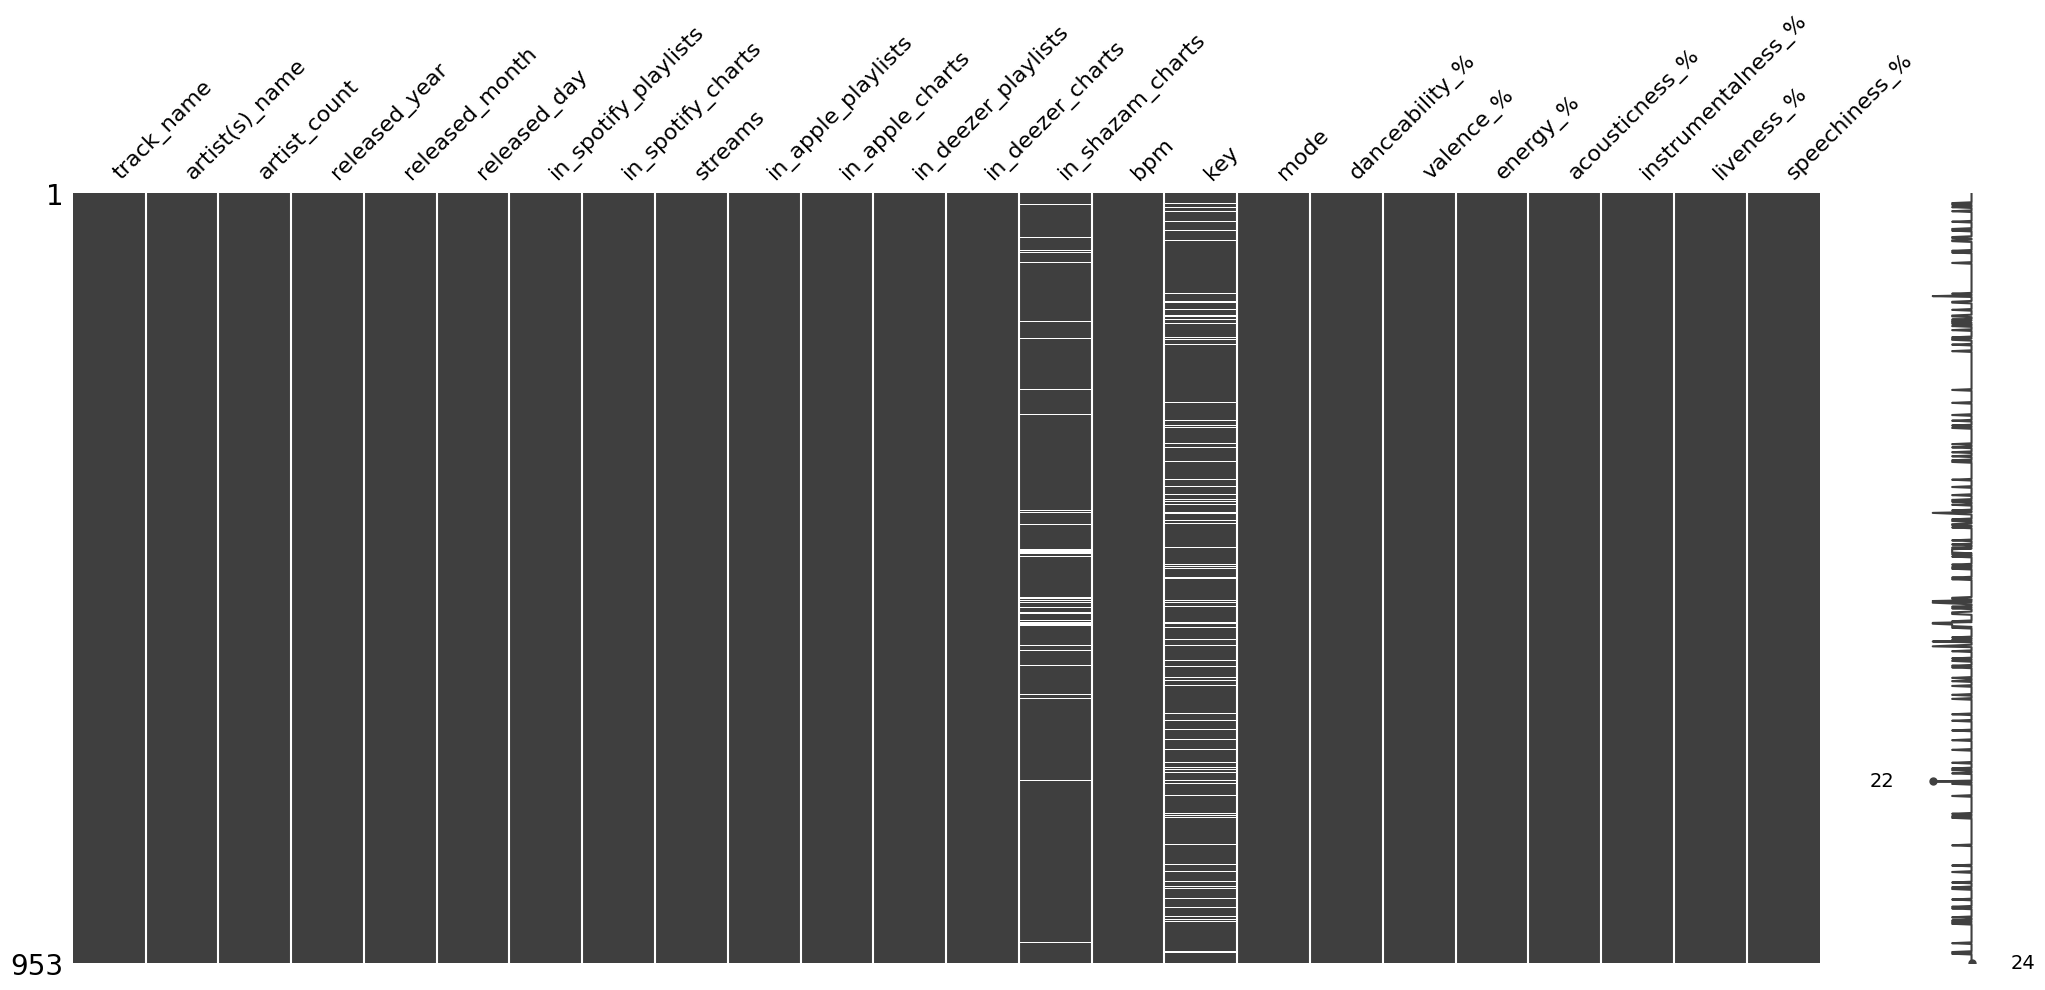

In [ ]:
msno.matrix(df_pre)

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df_pre.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df_pre.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [ ]:
# Handling Missing Data

df_pre['in_deezer_playlists'] = pd.to_numeric(df_pre['in_deezer_playlists'], errors='coerce')
df_pre['streams'] = pd.to_numeric(df_pre['streams'], errors='coerce')
df_pre['in_shazam_charts'] = pd.to_numeric(df_pre['in_shazam_charts'], errors='coerce')


df_pre['in_shazam_charts'].fillna((df_pre['in_shazam_charts'].mean()),inplace=True)
df_pre.drop_duplicates()
spotify_data = df_pre.dropna()  # Drop rows with missing values

spotify_data = spotify_data[spotify_data['streams'].apply(lambda x: str(x).isnumeric())]

# Save the preprocessed data to a new CSV file
spotify_data.to_csv('spotify_preprocessed.csv', index=False)

# Load your data
df = pd.read_csv('/content/spotify_preprocessed.csv',encoding='latin-1')


In [ ]:
# Load your data
df = pd.read_csv('/content/spotify_preprocessed.csv',encoding='latin-1')
spotify_data = pd.read_csv('/content/spotify_preprocessed.csv',encoding='latin-1')

<Axes: >

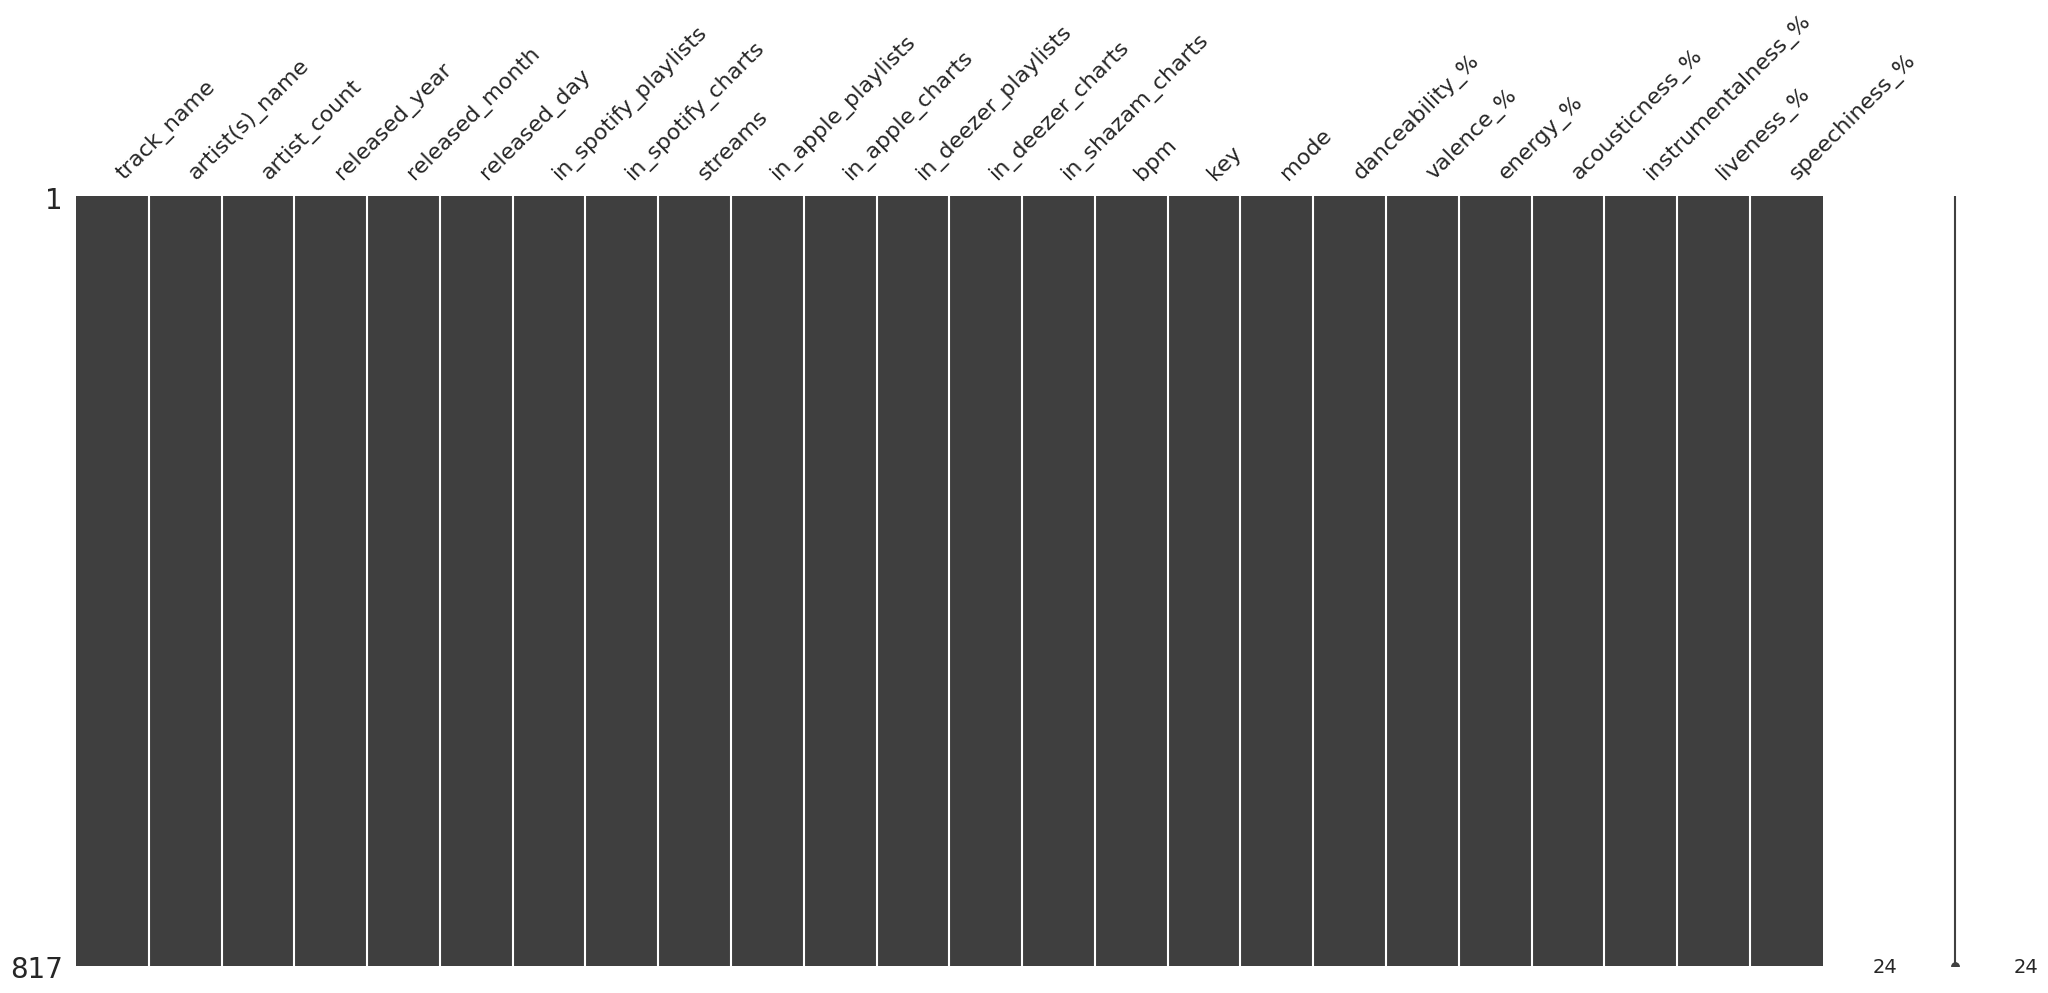

In [ ]:
msno.matrix(spotify_data)

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
df.columns.values

array(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'], dtype=object)

# **Key Attributes Correlation with Streams**

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703.0          

<ipython-input-66-745a51224862>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify_data.corr()


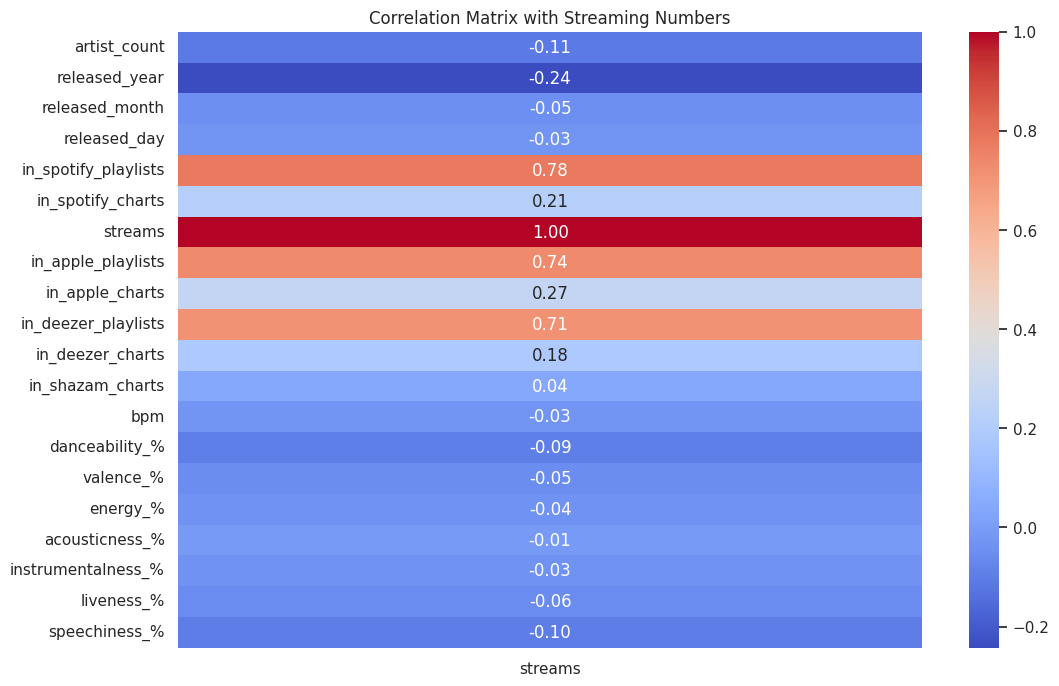

streams                 1.000000
in_spotify_playlists    0.780404
in_apple_playlists      0.735321
in_deezer_playlists     0.712953
in_apple_charts         0.269137
in_spotify_charts       0.214034
in_deezer_charts        0.184329
in_shazam_charts        0.043512
acousticness_%         -0.005751
released_day           -0.025116
bpm                    -0.025694
instrumentalness_%     -0.033039
energy_%               -0.036499
released_month         -0.046041
valence_%              -0.051014
liveness_%             -0.056664
danceability_%         -0.093268
speechiness_%          -0.099968
artist_count           -0.109760
released_year          -0.242726
Name: streams, dtype: float64


In [ ]:
spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data['in_shazam_charts'] = pd.to_numeric(spotify_data['in_shazam_charts'], errors='coerce')


# Display the first few rows of the dataset
print(spotify_data.head())

# Correlation Analysis
correlation_matrix = spotify_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['streams']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Streaming Numbers')
plt.show()

# Sort features based on their correlation with streaming numbers
correlation_with_streams = correlation_matrix['streams'].sort_values(ascending=False)
print(correlation_with_streams)


# **Musical Attributes Correlation with Streams**

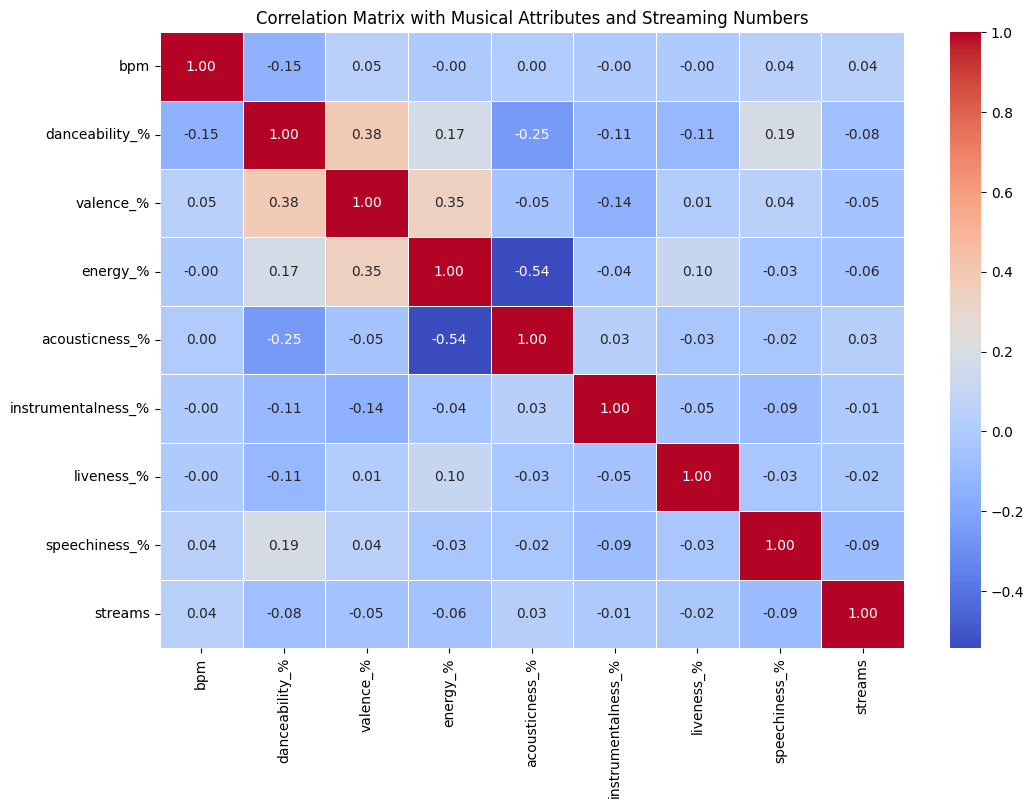

streams               1.000000
bpm                   0.037341
acousticness_%        0.029359
instrumentalness_%   -0.009558
liveness_%           -0.021259
valence_%            -0.050189
energy_%             -0.060459
danceability_%       -0.075801
speechiness_%        -0.094119
Name: streams, dtype: float64


In [ ]:
# List of musical attributes
musical_attributes = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                      'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Correlation Analysis for musical attributes
correlation_matrix = spotify_data[musical_attributes + ['streams']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix with Musical Attributes and Streaming Numbers')
plt.show()

# Sort features based on their correlation with streaming numbers
correlation_with_streams = correlation_matrix['streams'].sort_values(ascending=False)
print(correlation_with_streams)

# **Artist Count Correlation with Streams in 2023**

<ipython-input-49-67a97246d8f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_count', y='streams', data=spotify_data_2023, palette="muted")


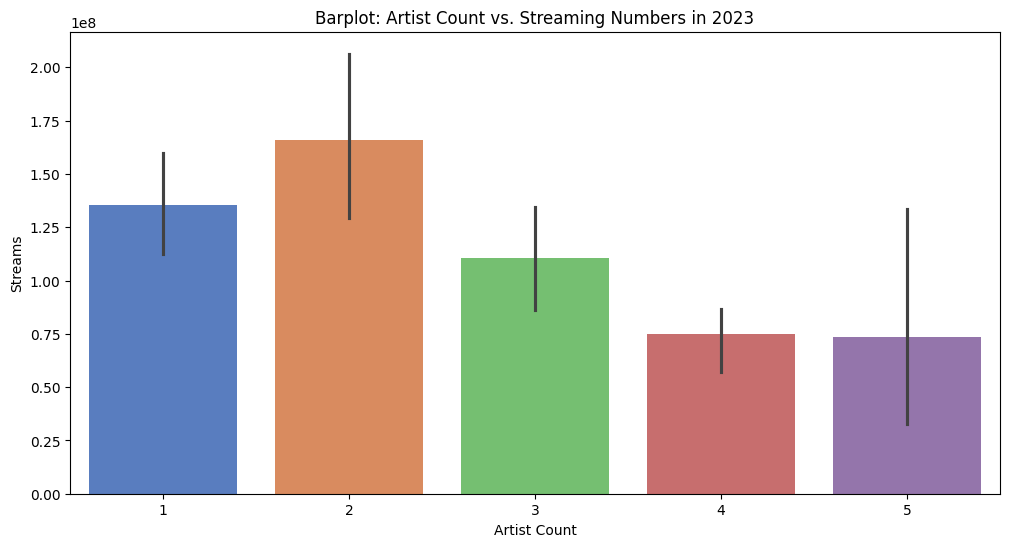

Correlation between Artist Count and Streams:
-0.05292009171709148


In [ ]:
# Filter data for the year 2023
spotify_data_2023 = spotify_data[spotify_data['released_year'] == 2023]

# Correlation Analysis for artist count and streaming numbers
correlation_artist_streams = spotify_data_2023[['artist_count', 'streams']].corr()

# Visualize the correlation using a box plot
plt.figure(figsize=(12, 6))
sns.barplot(x='artist_count', y='streams', data=spotify_data_2023, palette="muted")
plt.title('Barplot: Artist Count vs. Streaming Numbers in 2023')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.show()

# Display correlation coefficient
print("Correlation between Artist Count and Streams:")
print(correlation_artist_streams.loc['artist_count', 'streams'])

# **Artist Count Correlation with Streams**

<ipython-input-50-d1a360e3f5ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_count', y='streams', data=spotify_data, palette="muted")


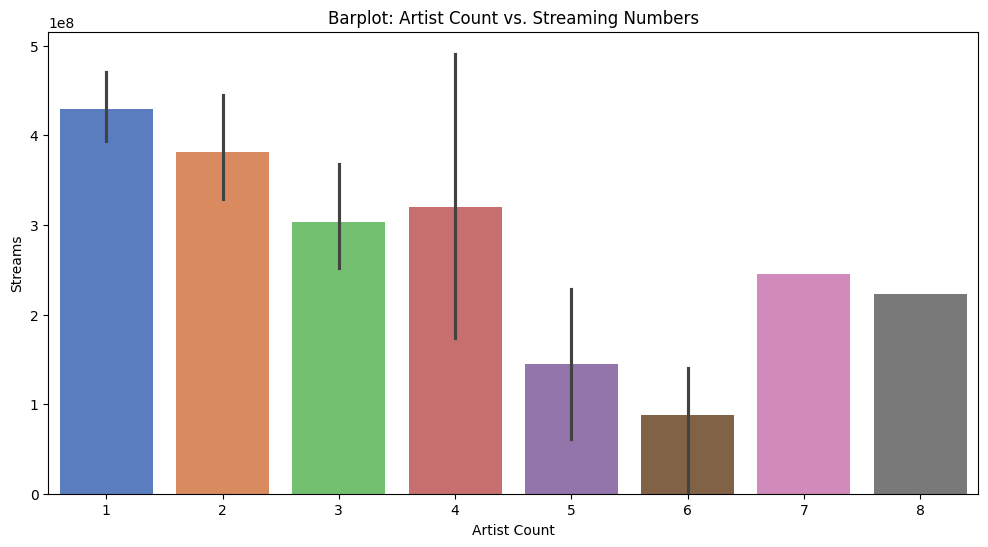

Correlation between Artist Count and Streams:
-0.1163859668774065


In [ ]:
# Correlation Analysis for artist count and streaming numbers
correlation_artist_streams = spotify_data[['artist_count', 'streams']].corr()

# Visualize the correlation using a box plot
plt.figure(figsize=(12, 6))
sns.barplot(x='artist_count', y='streams', data=spotify_data, palette="muted")
plt.title('Barplot: Artist Count vs. Streaming Numbers')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.show()

# Display correlation coefficient
print("Correlation between Artist Count and Streams:")
print(correlation_artist_streams.loc['artist_count', 'streams'])

# **Release Month Correlation with Streams**

<ipython-input-67-ae9c5c01647f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='released_month', y='streams', data=spotify_data, palette="muted")


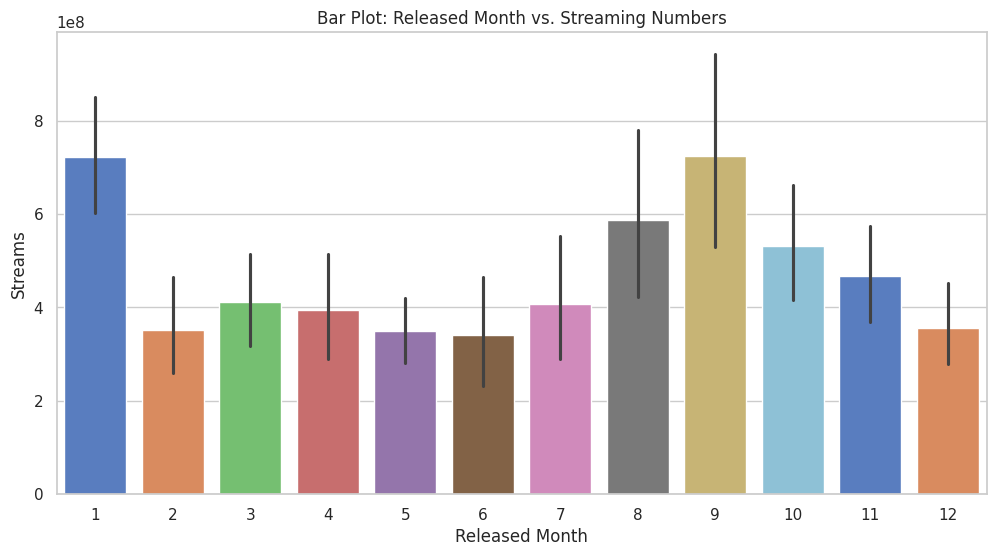

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a violin plot to visualize the distribution of streaming numbers for different release days
plt.figure(figsize=(12, 6))
sns.barplot(x='released_month', y='streams', data=spotify_data, palette="muted")
plt.title('Bar Plot: Released Month vs. Streaming Numbers' )
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.show()

# **Release Day Correlation with Streams**

<ipython-input-52-2cdf45eb64c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='released_day', y='streams', data=spotify_data, palette="muted")


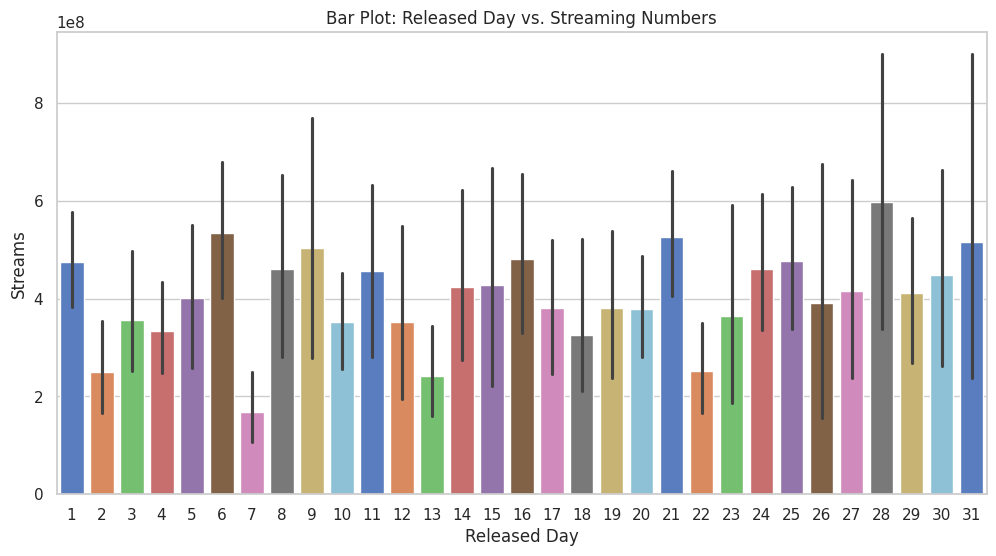

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a violin plot to visualize the distribution of streaming numbers for different release days
plt.figure(figsize=(12, 6))
sns.barplot(x='released_day', y='streams', data=spotify_data, palette="muted")
plt.title('Bar Plot: Released Day vs. Streaming Numbers' )
plt.xlabel('Released Day')
plt.ylabel('Streams')
plt.show()

**<h3> Learning Curve function**

In [ ]:
# Plot Learning Curves
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors = []
    test_errors = []

    for i in range(1, len(X_train) + 1):
        model.fit(X_train[:i], y_train[:i])

        y_train_pred = model.predict(X_train[:i])
        train_errors.append(mean_squared_error(y_train[:i], y_train_pred))

        y_test_pred = model.predict(X_test)
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    plt.plot(train_errors, label='Training Error')
    plt.plot(test_errors, label='Testing Error')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

# **Linear Regression Machine Learning Model**

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select features and target variable
features = ['artist_count', 'released_year', 'released_month', 'released_day',
            'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
            'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
            'in_shazam_charts', 'bpm','key','mode', 'danceability_%', 'valence_%', 'energy_%',
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

target = 'streams'

X = spotify_data[features]
y = spotify_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append the model to the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Linear Regression Metrics:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot Learning Curves
#plot_learning_curves(model, X_train, y_train, X_test, y_test)


Linear Regression Metrics:
Mean Squared Error: 4.019524858037183e+16
R-squared: 0.6730189953445402
Mean Absolute Error: 151071866.68865886


# **Random Forest Machine Learning Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select features and target variable
features = ['artist_count', 'released_year', 'released_month', 'released_day',
            'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
            'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
            'in_shazam_charts', 'bpm','key','mode', 'danceability_%', 'valence_%', 'energy_%',
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

target = 'streams'

X = spotify_data[features]
y = spotify_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append the model to the preprocessing pipeline
rfmodel = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rfmodel.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)

print(f'Random Forest Metrics:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')
print(f'Mean Absolute Error: {mae_rf}')

# Plot Learning Curves
#plot_learning_curves(rfmodel, X_train, y_train, X_test, y_test)

Random Forest Metrics:
Mean Squared Error: 3.246476210548678e+16
R-squared: 0.7359050906744171
Mean Absolute Error: 119217173.46070065


# **Model Comparison** (Linear vs Random Forest)

In [ ]:
# Compare the models
print('Model Comparison:')
if mse < mse_rf and mae < mae_rf and r2 > r2_rf:
    print('Linear Regression model performs better.')
else:
    print('Random Forest model performs better.')

Model Comparison:
Random Forest model performs better.


# **Prediction of Streams using Random Forest Regression**

In [ ]:
new_song_features = {
    'artist_count': 1,
    'released_year': 2024,
    'released_month': 5,
    'released_day': 15,
    'in_spotify_playlists': 1,
    'in_spotify_charts': 1,
    'in_apple_playlists': 0,
    'in_apple_charts': 0,
    'in_deezer_playlists': '50',
    'in_deezer_charts': 0,
    'in_shazam_charts': '194',
    'bpm': 120,
    'key':'B',
    'mode':'Major',
    'danceability_%': 65,
    'valence_%': 70,
    'energy_%': 75,
    'acousticness_%': 20,
    'instrumentalness_%': 5,
    'liveness_%': 10,
    'speechiness_%': 15,
}

# Transform the new song features using the preprocessing pipeline
transformed_new_song_features = rfmodel.named_steps['preprocessor'].transform(pd.DataFrame([new_song_features]))

# Predict the number of streams for the new song
predicted_streams = rfmodel.named_steps['regressor'].predict(transformed_new_song_features)


print(f'Predicted Streams for the New Song Using Random Forest: {predicted_streams[0]}')

Predicted Streams for the New Song Using Random Forest: 68281751.3


# **Prediction of Streams using Linear Regression Model**

In [ ]:
new_song_features = {
    'artist_count': 1,
    'released_year': 2024,
    'released_month': 5,
    'released_day': 15,
    'in_spotify_playlists': 1,
    'in_spotify_charts': 1,
    'in_apple_playlists': 0,
    'in_apple_charts': 0,
    'in_deezer_playlists': '50',
    'in_deezer_charts': 0,
    'in_shazam_charts': '194',
    'bpm': 120,
    'key':'B',
    'mode':'Major',
    'danceability_%': 65,
    'valence_%': 70,
    'energy_%': 75,
    'acousticness_%': 20,
    'instrumentalness_%': 5,
    'liveness_%': 10,
    'speechiness_%': 15,
}

# Transform the new song features using the preprocessing pipeline
transformed_new_song_features = model.named_steps['preprocessor'].transform(pd.DataFrame([new_song_features]))

# Predict the number of streams for the new song
predicted_streams = model.named_steps['regressor'].predict(transformed_new_song_features)


print(f'Predicted Streams for the New Song using Linear Regression: {predicted_streams[0]}')

Predicted Streams for the New Song using Linear Regression: 74175804.78192401
